In [1]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('2_recoverd_param_lerch_voss_mean_median.csv')

In [3]:
df.insert(3, "v_total = v2 - v1", df['v1_mean']-df['v2_mean'], True)


In [4]:
df.insert(4, "v_bias = v2 + v1", df['v1_mean']+df['v2_mean'], True)


In [5]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [6]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,3.045761,-1.886244,4.932004,1.159517,0.490160,1.287587,0.498468,0.016445,1.964707,3.042651,-1.885393,0.489585,1.287625,0.498322,0.015441,1.974194
1,1025_class_words_part_2.dat,4.184019,-3.033869,7.217888,1.150151,0.473132,0.992384,0.452771,-0.001727,1.985501,4.189026,-3.034327,0.473779,0.988134,0.452722,-0.001694,1.996919
2,1011_class_pictures_part_1.dat,1.183248,-2.068872,3.252120,-0.885623,0.448963,0.802030,0.672016,0.068462,1.703470,1.155070,-2.054302,0.449528,0.808815,0.672385,0.069677,1.730916
3,017_class_pictures_part_1.dat,2.160075,-3.854435,6.014510,-1.694360,0.540478,1.334036,0.585844,0.006914,2.002214,2.163931,-3.856982,0.541421,1.324728,0.586148,0.006844,2.011112
4,1004_class_pictures_part_1.dat,1.881073,-1.807869,3.688942,0.073205,0.474254,1.435810,0.582226,-0.004146,2.007113,1.884827,-1.802566,0.472489,1.433489,0.581822,-0.003292,2.010884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.394787,-2.054743,4.449530,0.340045,0.459047,1.476391,0.602516,-0.009770,1.988530,2.384256,-2.050200,0.458715,1.470051,0.603367,-0.008773,1.998020
410,1023_class_pictures_part_1.dat,3.505386,-3.467251,6.972636,0.038135,0.480560,1.472748,0.587795,0.004520,1.914582,3.503307,-3.461909,0.480993,1.425354,0.590417,0.003525,1.937967
411,4012_class_pictures_part_1.dat,2.257025,-1.931329,4.188353,0.325696,0.453542,1.333049,0.496032,-0.005215,1.931201,2.239915,-1.922987,0.453717,1.331196,0.496362,-0.003401,1.942491
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


In [7]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_1.')]
df_pictures_part_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_pictures_part_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
2,1011_class_pictures_part_1.dat,1.183248,-2.068872,3.252120,-0.885623,0.448963,0.802030,0.672016,0.068462,1.703470,1.155070,-2.054302,0.449528,0.808815,0.672385,0.069677,1.730916
3,017_class_pictures_part_1.dat,2.160075,-3.854435,6.014510,-1.694360,0.540478,1.334036,0.585844,0.006914,2.002214,2.163931,-3.856982,0.541421,1.324728,0.586148,0.006844,2.011112
4,1004_class_pictures_part_1.dat,1.881073,-1.807869,3.688942,0.073205,0.474254,1.435810,0.582226,-0.004146,2.007113,1.884827,-1.802566,0.472489,1.433489,0.581822,-0.003292,2.010884
10,4001_class_pictures_part_1.dat,2.048332,-2.286428,4.334760,-0.238095,0.438452,1.395709,0.520447,-0.002704,1.978356,2.043871,-2.274141,0.437815,1.391439,0.520854,-0.002406,1.987540
26,008_class_pictures_part_1.dat,1.967541,-2.755983,4.723525,-0.788442,0.496857,1.732436,0.501452,-0.012823,1.983287,1.962258,-2.744541,0.497799,1.721564,0.501911,-0.011094,1.993826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,002_class_pictures_part_1.dat,2.775742,-0.937531,3.713272,1.838211,0.339317,0.908028,0.625898,0.036165,1.947434,2.778740,-0.914249,0.337215,0.915244,0.624798,0.036352,1.969293
401,005_class_pictures_part_1.dat,2.090355,-1.812821,3.903176,0.277534,0.339445,1.678404,0.551318,0.008172,1.825753,2.080451,-1.806741,0.337745,1.671921,0.551882,0.008366,1.847312
409,2005_class_pictures_part_1.dat,2.394787,-2.054743,4.449530,0.340045,0.459047,1.476391,0.602516,-0.009770,1.988530,2.384256,-2.050200,0.458715,1.470051,0.603367,-0.008773,1.998020
410,1023_class_pictures_part_1.dat,3.505386,-3.467251,6.972636,0.038135,0.480560,1.472748,0.587795,0.004520,1.914582,3.503307,-3.461909,0.480993,1.425354,0.590417,0.003525,1.937967


In [8]:
df_word_part_1=df_word_part_1.sort_values('Experiment')

In [9]:
df_pictures_part_1=df_pictures_part_1.sort_values('Experiment')

In [10]:
corr_frame = pd.DataFrame()
data = {'v1_mean_word':np.array(df_word_part_1['v1_mean']),'v1_mean_picture':np.array(df_pictures_part_1['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
corr_data = pd.DataFrame(data)

ValueError: All arrays must be of the same length

In [158]:
corr_data

,Experiment,v1_mean_part_1,v1_mean_part_2
368,001_class_words_part_1.dat,1.932449,1.836586
108,002_class_words_part_1.dat,2.702269,3.120898
347,003_class_words_part_1.dat,3.536402,3.032153
97,004_class_words_part_1.dat,2.840207,2.106693
62,005_class_words_part_1.dat,3.629910,4.021148
...,...,...,...
393,4009_class_words_part_1.dat,1.950321,2.035931
242,4010_class_words_part_1.dat,2.728556,2.771703
176,4011_class_words_part_1.dat,2.009517,1.966102
341,4012_class_words_part_1.dat,2.799609,2.749953


In [9]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [159]:


df_x = corr_data[['v1_mean_part_1', 'v1_mean_part_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_part_1', 'v1_mean_part_2']])
df_x

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,v1_mean_part_1,v1_mean_part_2,mahala
368,1.932449,1.836586,2.875042
108,2.702269,3.120898,0.720728
347,3.536402,3.032153,3.453610
97,2.840207,2.106693,4.059589
62,3.629910,4.021148,3.070563
...,...,...,...
393,1.950321,2.035931,2.436722
242,2.728556,2.771703,0.032060
176,2.009517,1.966102,2.299828
341,2.799609,2.749953,0.102952


In [160]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

13.815510557964274

In [161]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [162]:
df_without_outlier

,v1_mean_part_1,v1_mean_part_2,mahala,p_value


In [163]:
x = df_x['v1_mean_part_1']
y = df_x['v1_mean_part_2']

corr = np.corrcoef(x, y)
corr

array([[1.        , 0.78609582],
       [0.78609582, 1.        ]])

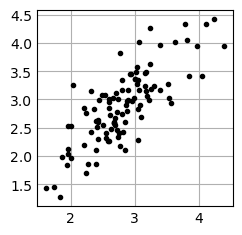

In [164]:
#plt.style.use('_mpl-gallery')

np.random.seed(3)
plt.plot(x, y, '.', color='black');

In [165]:
for column in df_word_part_1:
    print (column)

Experiment
v1_mean
v2_mean
v_total = v2 - v1
v_bias = v2 + v1
zr_mean
a_mean
ndt_mean
sndt_mean
alpha_mean
v1_median
v2_median
zr_median
a_median
ndt_median
sndt_median
alpha_median


v1_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


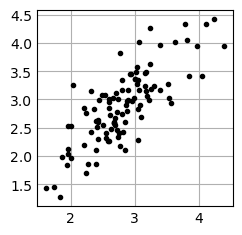

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean


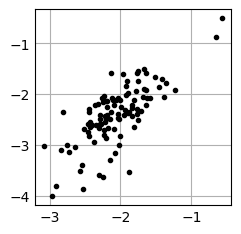

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean


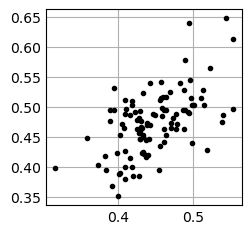

a_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


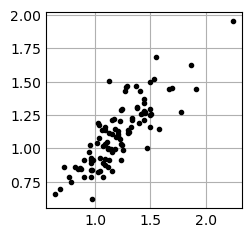

ndt_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


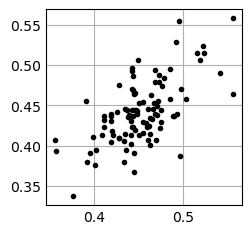

sndt_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


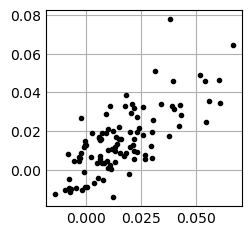

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean


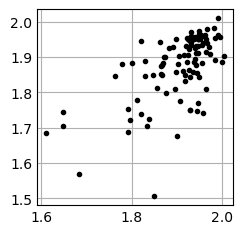

v_total = v2 - v1


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


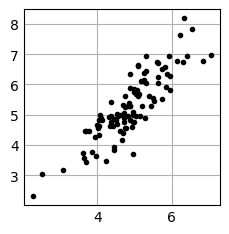

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1


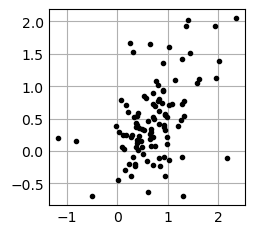

In [173]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_word_class.csv',index=False)
 
    


In [168]:
type(corr)

numpy.float64

In [170]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_words,between session,0.786096,0.73337,0.568431,0.825054,0.62521,0.732236,0.61177,0.863206,0.456259


In [182]:
df = pd.read_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv')

In [183]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,2.775302,-1.843634,4.618935,0.931668,0.488304,1.286637,0.491423,0.020234,1.939520,2.773315,-1.846082,0.488600,1.281603,0.491504,0.019269,1.949172
1,1025_class_words_part_2.dat,3.951487,-3.030869,6.982357,0.920618,0.460097,1.024971,0.444822,-0.005482,1.973413,3.954950,-3.037287,0.458662,1.018384,0.445139,-0.005015,1.982923
2,1011_class_pictures_part_1.dat,1.094287,-2.053254,3.147541,-0.958966,0.453859,0.842740,0.664780,0.071449,1.680715,1.091987,-2.045152,0.454633,0.854842,0.665247,0.072577,1.714519
3,017_class_pictures_part_1.dat,1.991843,-3.771075,5.762918,-1.779232,0.528398,1.331145,0.578720,0.009057,1.953899,1.983995,-3.763898,0.527143,1.319353,0.579576,0.009263,1.964867
4,1004_class_pictures_part_1.dat,1.695352,-1.766107,3.461459,-0.070756,0.480083,1.414699,0.578250,0.005018,1.988156,1.686150,-1.760669,0.480401,1.408314,0.578744,0.006036,1.997333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.135326,-2.062411,4.197737,0.072915,0.469826,1.455127,0.596721,-0.002554,1.931114,2.137020,-2.062913,0.469075,1.444680,0.597516,-0.002212,1.940250
410,1023_class_pictures_part_1.dat,3.307016,-3.484820,6.791837,-0.177804,0.474430,1.509676,0.579413,0.004299,1.862007,3.292227,-3.468304,0.473009,1.448166,0.583168,0.004180,1.879247
411,4012_class_pictures_part_1.dat,2.051275,-1.920975,3.972249,0.130300,0.456702,1.345215,0.487066,-0.000880,1.877587,2.047991,-1.912331,0.456495,1.335037,0.487524,0.000836,1.889739
412,4012_class_pictures_part_2.dat,1.925139,-3.061887,4.987026,-1.136749,0.538818,1.016065,0.486288,0.024233,1.820477,1.916742,-3.052243,0.538277,1.013394,0.486856,0.023971,1.850107


# class_pictures

In [7]:
#consider one task in two session 
df_class_pictures_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_class_pictures_2 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
6,1011_class_pictures_part_2.dat,1.521192,-1.381937,2.903128,0.139255,0.431612,0.813536,0.567737,0.015838,1.852055,1.507616,-1.366583,0.430473,0.820090,0.567440,0.014719,1.886254
7,2001_class_pictures_part_2.dat,2.537672,-3.069423,5.607095,-0.531751,0.423771,1.686591,0.496619,-0.019674,1.971699,2.530272,-3.058482,0.422569,1.668224,0.498256,-0.018804,1.985204
8,1021_class_pictures_part_2.dat,3.893263,-4.381039,8.274302,-0.487776,0.551409,1.512247,0.524401,-0.001437,1.959123,3.892303,-4.421184,0.553390,1.477201,0.526697,-0.001397,1.972604
13,4004_class_pictures_part_2.dat,2.831184,-2.345578,5.176762,0.485605,0.365945,0.852385,0.555158,0.040578,1.889070,2.823187,-2.327886,0.361180,0.849662,0.554321,0.041232,1.922671
19,1020_class_pictures_part_2.dat,3.041624,-2.627500,5.669124,0.414124,0.410516,1.434432,0.539972,-0.010225,1.994102,3.049235,-2.641087,0.409136,1.421854,0.540657,-0.009599,2.003778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,3003_class_pictures_part_2.dat,2.878718,-2.400901,5.279619,0.477817,0.392220,1.275650,0.484662,0.000293,1.967320,2.880454,-2.411948,0.389823,1.263853,0.484820,0.001645,1.978158
402,011_class_pictures_part_2.dat,3.314563,-3.512272,6.826834,-0.197709,0.487942,1.101947,0.513341,0.002766,1.982045,3.306083,-3.490823,0.487174,1.092838,0.513854,0.003441,1.992730
407,3017_class_pictures_part_2.dat,3.650386,-1.697564,5.347950,1.952822,0.397638,0.934083,0.648869,0.023299,1.977516,3.638426,-1.672621,0.396549,0.934243,0.647847,0.022686,1.992248
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


In [23]:
df_class_pictures_1=df_class_pictures_1.sort_values('Experiment')
df_class_pictures_2=df_class_pictures_2.sort_values('Experiment')

In [24]:
data_analysis = {'Experiment':df_class_pictures_1['Experiment'],'par_1':np.array(df_class_pictures_1['v1_mean']),'par_2':np.array(df_class_pictures_2['v1_mean'])}
data_analysis
corr_frame = pd.DataFrame(data_analysis)
corr_frame

,Experiment,par_1,par_2
171,001_class_pictures_part_1.dat,2.631589,3.142965
400,002_class_pictures_part_1.dat,2.775742,2.550106
355,003_class_pictures_part_1.dat,2.184253,2.836046
86,004_class_pictures_part_1.dat,2.350880,2.263182
401,005_class_pictures_part_1.dat,2.090355,2.295909
...,...,...,...
266,4009_class_pictures_part_1.dat,2.489222,2.151345
269,4010_class_pictures_part_1.dat,2.902879,4.171052
83,4011_class_pictures_part_1.dat,1.080112,1.266913
411,4012_class_pictures_part_1.dat,2.257025,2.048675


In [25]:
df_x = corr_frame[['par_1', 'par_2']]


In [26]:
df_x = corr_frame[['par_1', 'par_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[['par_1', 'par_2']])
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_outliers=df_x.loc[df_x.p_value < 0.001]
ind=df_outliers.index
print(ind)

Int64Index([258], dtype='int64')


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.6661348356836365
v_bias = v2 + v1


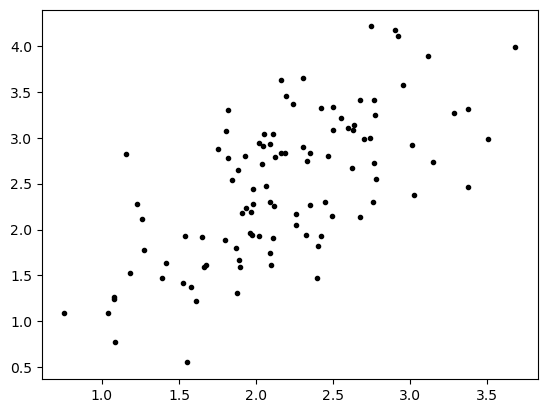

In [27]:
corr_without_outlier = corr_frame.drop(ind)
x = corr_without_outlier['par_1']
y = corr_without_outlier['par_2']
corr =  np.corrcoef(x, y)[0,1]
print(corr)
print(param)
plt.plot(x, y, '.', color='black')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([258], dtype='int64')
v1_mean


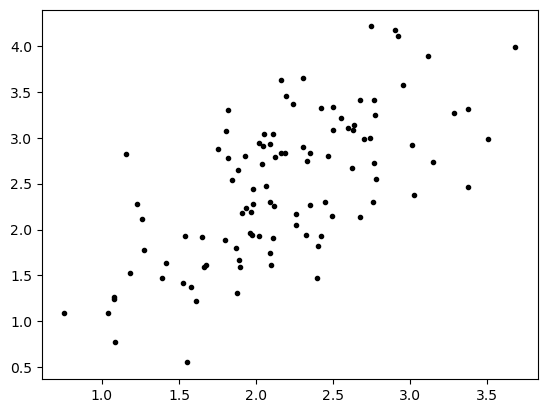

Int64Index([359], dtype='int64')
v2_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


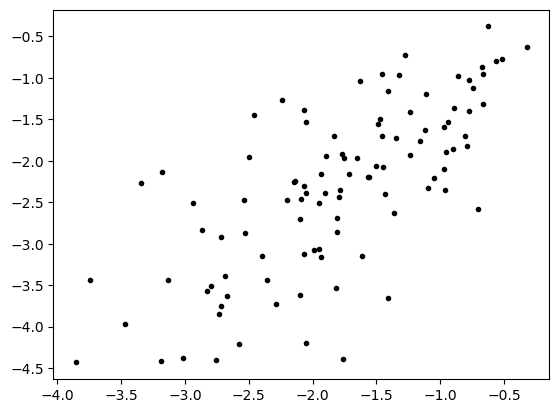

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([223], dtype='int64')
zr_mean


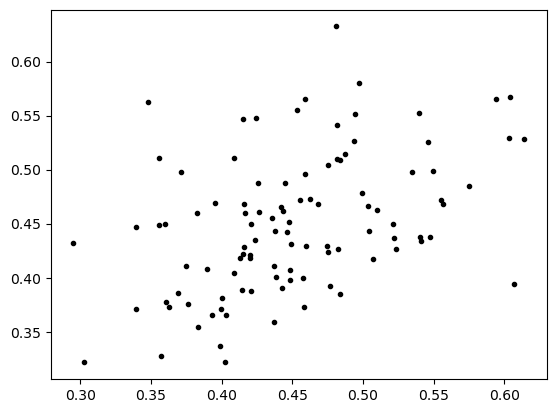

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
a_mean


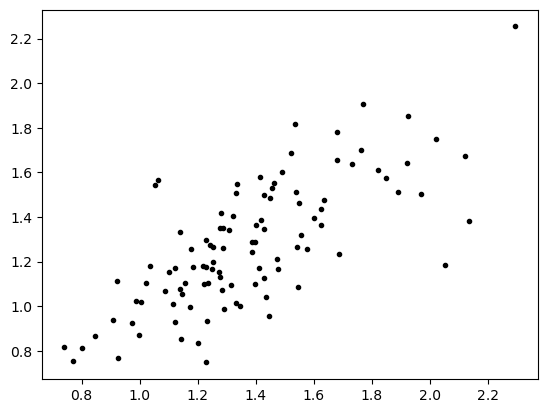

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([409], dtype='int64')
ndt_mean


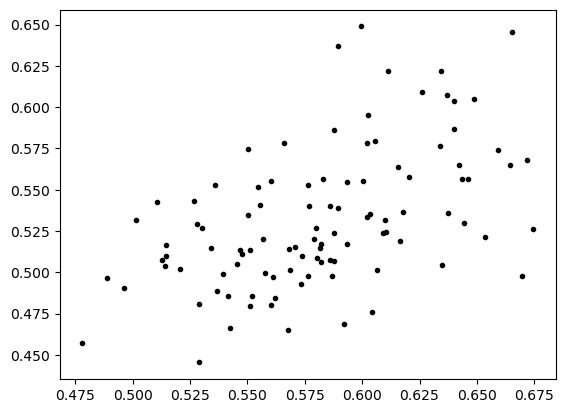

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([152, 223], dtype='int64')
sndt_mean


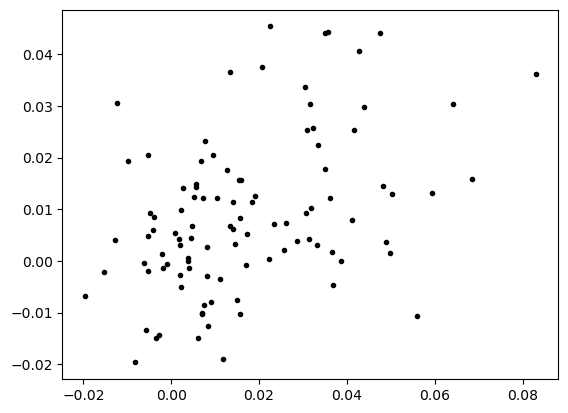

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([2, 409, 327], dtype='int64')
alpha_mean


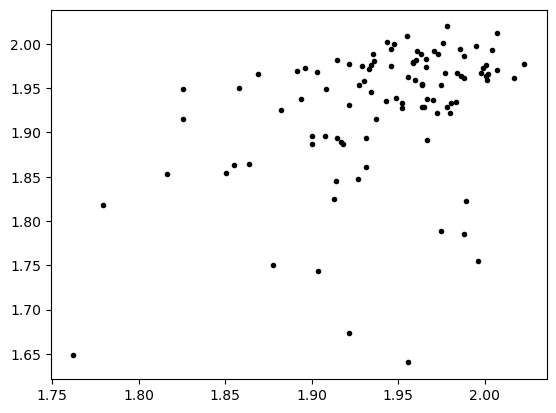

Int64Index([], dtype='int64')
v_total = v2 - v1


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


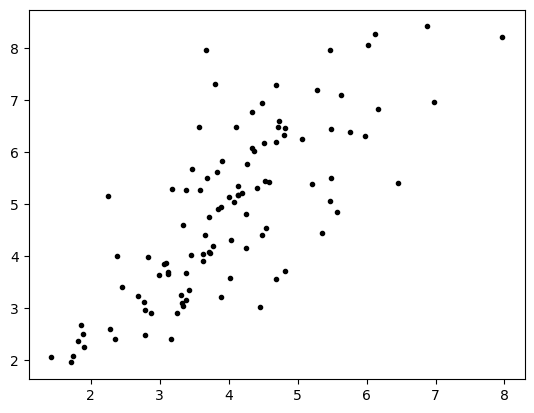

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
v_bias = v2 + v1


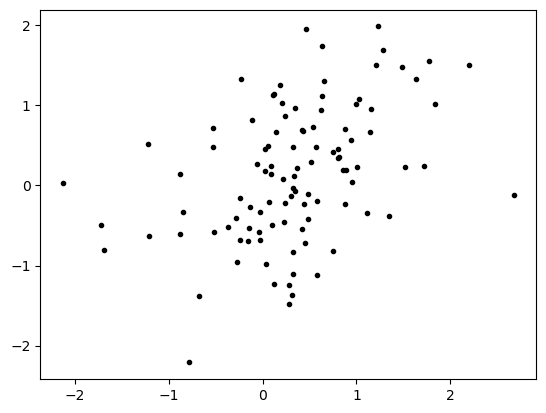

In [29]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_class_pictures.csv',index=False)
 
    


In [30]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_pictures,between session,0.666135,0.712565,0.43526,0.731934,0.514505,0.420097,0.403703,0.768859,0.422742
